<a href="https://colab.research.google.com/github/shahab271069/Python-Course/blob/main/08/Python_Eigth_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with Python

## Course Outline
1. **Introduction to Machine Learning**
2. **Setting Up the Environment**
3. **Supervised Learning**
4. **Neural Networks and Deep Learning**



## 1. Introduction to Machine Learning
- **What is Machine Learning?**  
  Machine Learning is a subset of artificial intelligence that enables systems to learn from data and improve performance over time without being explicitly programmed.
- **Types of Machine Learning:**  
  - **Supervised Learning:** The model is trained on labeled data.
  - **Unsupervised Learning:** The model is trained on unlabeled data.
  - **Reinforcement Learning:** The model learns by interacting with an environment to achieve a goal.

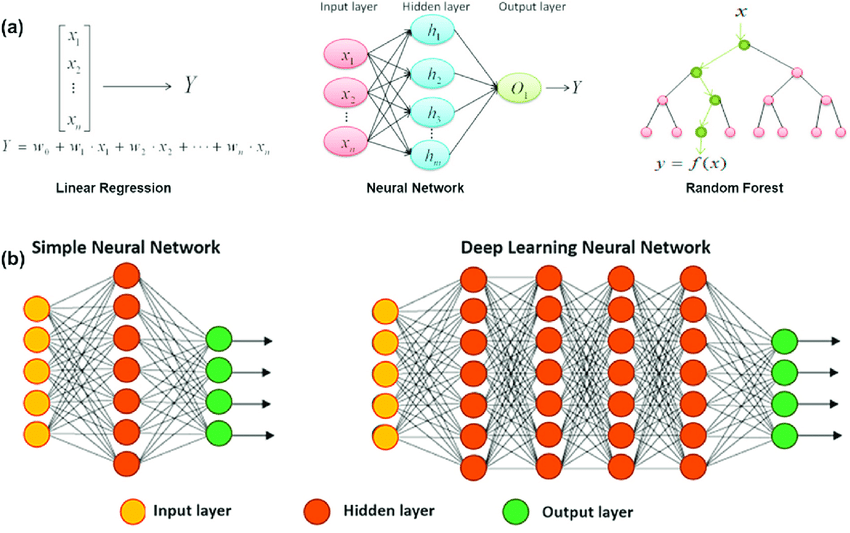

## 1.1. Types of Machine Learning Models

## A. Supervised Learning Models

1. **Regression Models:**
   - **Linear Regression**
   - **Polynomial Regression**
   - **Ridge Regression**
   - **Lasso Regression**

2. **Classification Models:**
   - **Logistic Regression**
   - **Decision Trees**
   - **Random Forest**
   - **Support Vector Machines (SVM)**
   - **K-Nearest Neighbors (KNN)**

## B. Unsupervised Learning Models

1. **Clustering Models:**
   - **K-Means Clustering**
   - **Hierarchical Clustering**
   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

2. **Dimensionality Reduction Models:**
   - **Principal Component Analysis (PCA)**
   - **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

## C. Reinforcement Learning Models

1. **Value-Based Models:**
   - **Q-Learning**
   - **Deep Q-Networks (DQN)**

2. **Policy-Based Models:**
   - **REINFORCE Algorithm**
   - **Actor-Critic Methods**

3. **Model-Based Reinforcement Learning:**
   - **Dynamic Programming**
   - **Monte Carlo Tree Search (MCTS)**

## D. Neural Networks and Deep Learning

1. **Neural Networks:**
   - **Feedforward Neural Networks:** A basic type of neural network where connections between nodes do not form cycles. Used for simple tasks.
   - **Convolutional Neural Networks (CNN):** Specialized for processing grid-like data, such as images, by applying convolutional layers.
   - **Recurrent Neural Networks (RNN):** Designed for sequential data (e.g., time series or text) where connections between nodes can create cycles, allowing information to persist.

2. **Deep Learning:**
   - **Deep Neural Networks (DNN):** Comprise multiple layers between input and output layers, enabling the model to learn complex patterns.
   - **Autoencoders:** Neural networks used for unsupervised learning, primarily for dimensionality reduction or feature learning.
   - **Generative Adversarial Networks (GANs):** Consist of two neural networks (generator and discriminator) that compete against each other to produce realistic data.
   - **Transformers:** A type of neural network architecture particularly effective for natural language processing tasks, enabling parallel processing of input data.

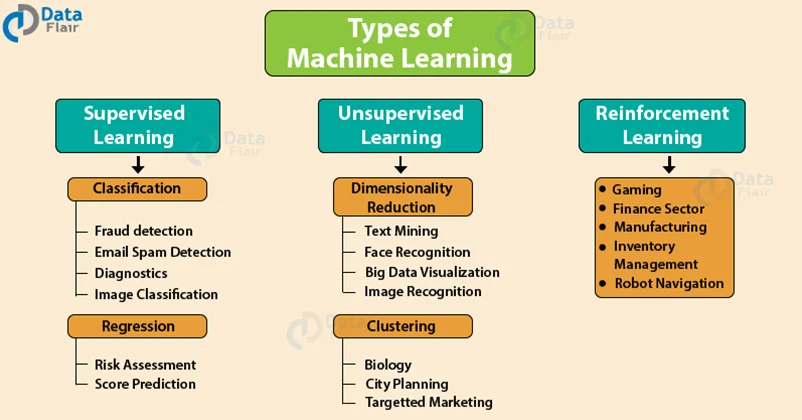

## 2. Setting Up the Environment
To get started with Machine Learning in Python, you need to install the following packages:

```bash
pip install numpy pandas matplotlib scikit-learn keras
```

This command installs essential libraries for data manipulation, visualization, and machine learning.

In [1]:
!pip install numpy pandas matplotlib scikit-learn keras meteostat

## 2. Download data and prepare for study area in Witzenhausen

In [40]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(1950, 1, 1)
end = datetime(2024, 12, 31)

# Create Point for Witzenhasen,
vancouver = Point(51.34809372422475, 9.853209171955255, 100)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()
data = data.dropna()

In [4]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1975-01-01,7.8,5.0,8.4,0.4,0.0,281.0,12.2,44.6,1027.3,0.0
1975-01-02,7.9,7.4,8.9,0.0,0.0,205.0,3.6,12.6,1032.5,0.0
1975-01-03,4.8,3.4,8.0,0.0,0.0,216.0,9.4,24.8,1029.9,186.0
1975-01-04,5.6,4.4,6.4,0.0,0.0,264.0,13.7,44.6,1028.6,0.0
1975-01-05,6.7,4.9,8.2,1.2,0.0,226.0,13.7,48.2,1023.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2024-12-27,2.0,-1.4,6.0,0.0,0.0,162.0,4.8,11.2,1035.3,0.0
2024-12-28,0.1,-2.1,6.0,0.0,0.0,196.0,7.7,10.1,1030.6,411.0
2024-12-29,-1.0,-3.2,0.8,0.0,0.0,216.0,9.7,22.0,1030.0,154.0


In [5]:
data.columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
# Prepare features and target
X = data[['tmin', 'tmax', 'wdir', 'wspd', 'wpgt', 'pres','tsun']]
y = data['prcp']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## 3. Supervised Learning
### Linear Regression
- **Description:** Linear regression is used for predicting a continuous value based on the relationship between input features and the target variable.


In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')



Linear Regression Mean Squared Error: 12.920099126116266


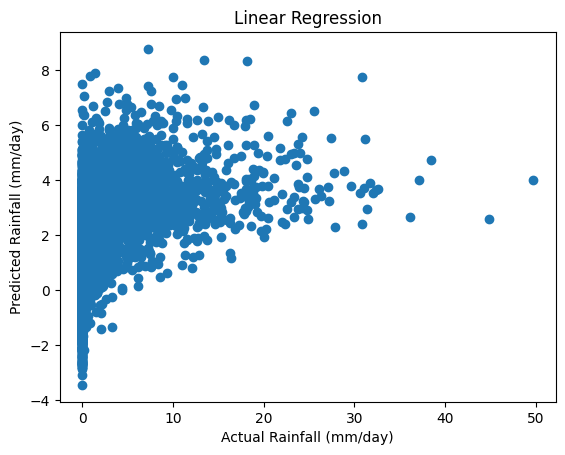

In [8]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('Linear Regression')
plt.show()

In [9]:
data.corr()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
tavg,1.000000,0.930085,0.971286,0.044131,-0.361584,-0.011072,-0.096219,0.059509,-0.118961,0.444969
tmin,0.930085,1.000000,0.847801,0.127651,-0.374292,0.089318,-0.010057,0.116910,-0.187426,0.197613
tmax,0.971286,0.847801,1.000000,-0.005436,-0.337854,-0.068378,-0.168268,0.016450,-0.064581,0.583681
prcp,0.044131,0.127651,-0.005436,1.000000,-0.027315,0.106695,0.214457,0.288158,-0.319601,-0.255773
snow,-0.361584,-0.374292,-0.337854,-0.027315,1.000000,0.014674,-0.082410,-0.096229,-0.011699,-0.110785
wdir,-0.011072,0.089318,-0.068378,0.106695,0.014674,1.000000,0.154186,0.167575,-0.068662,-0.240142
wspd,-0.096219,-0.010057,-0.168268,0.214457,-0.082410,0.154186,1.000000,0.794437,-0.341872,-0.229972
wpgt,0.059509,0.116910,0.016450,0.288158,-0.096229,0.167575,0.794437,1.000000,-0.390730,-0.112806
pres,-0.118961,-0.187426,-0.064581,-0.319601,-0.011699,-0.068662,-0.341872,-0.390730,1.000000,0.210138
tsun,0.444969,0.197613,0.583681,-0.255773,-0.110785,-0.240142,-0.229972,-0.112806,0.210138,1.000000


In [11]:
from sklearn.model_selection import train_test_split
# Prepare features and target
X = data[[ 'wdir', 'wspd', 'wpgt', 'pres','tsun']]
y = data['prcp']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Mean Squared Error: {mse}')



Linear Regression Mean Squared Error: 13.06249656335533


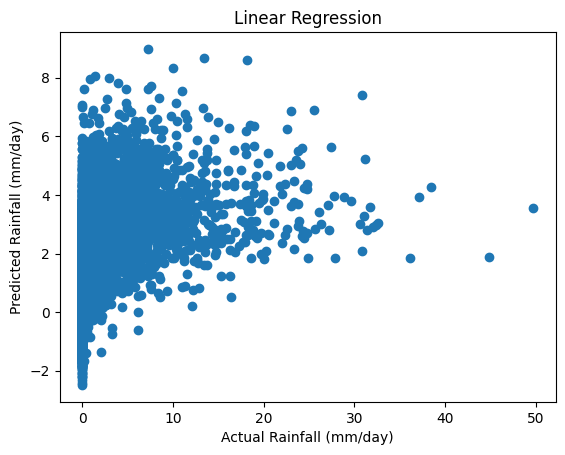

In [13]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('Linear Regression')
plt.show()

### Random Forest
- **Description:** Random Forest is an ensemble learning method that combines multiple decision trees to improve classification and regression tasks.



In [43]:
data = data.reset_index()

In [44]:
data['day'] = data.time.dt.day
data['month'] = data.time.dt.month
data['year'] = data.time.dt.year


In [45]:
from sklearn.model_selection import train_test_split
# Prepare features and target
X = data[['day', 'month', 'year', 'tmin', 'tmax', 'wdir', 'wspd', 'wpgt', 'pres','tsun']]
y = data['prcp']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=False)

In [35]:
# Create and train the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'RF Regression Mean Squared Error: {mse}')

RF Regression Mean Squared Error: 13.39392006912576


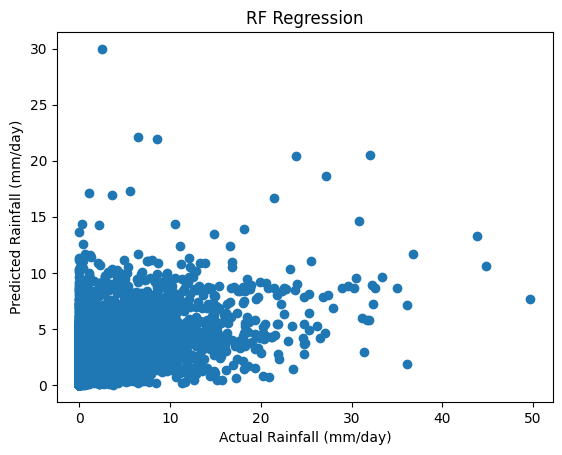

In [36]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('RF Regression')
plt.show()

In [37]:
!pip install lightgbm optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


[I 2025-01-13 10:21:59,700] A new study created in memory with name: no-name-b05416e6-0a05-4f5e-9820-013e4edc3b8d


  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[11]	valid_0's rmse: 4.00101
[I 2025-01-13 10:22:00,554] Trial 0 finished with value: 16.008042944075854 and parameters: {'num_leaves': 198, 'learning_rate': 0.23939366268677645, 'feature_fraction': 0.9256514156891716, 'bagging_fraction': 0.45469273238869834, 'bagging_freq': 6, 'min_child_samples': 12, 'n_estimators': 3213}. Best is trial 0 with value: 16.008042944075854.
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	valid_0's rmse: 3.80011
[I 2025-01-13 10:22:01,150] Trial 1 finished with value: 14.440865571107595 and parameters: {'num_leaves': 169, 'learning_rate': 0.09630955615824949, 'feature_fraction': 0.7040685172478143, 'bagging_fraction': 0.9145154042707414, 'bagging_freq': 6, 'min_child_samples': 90, 'n_estimators': 7010}. Best is trial 1 with value: 14.440865571107595.
Training until validation scores don't improve for 100 ro

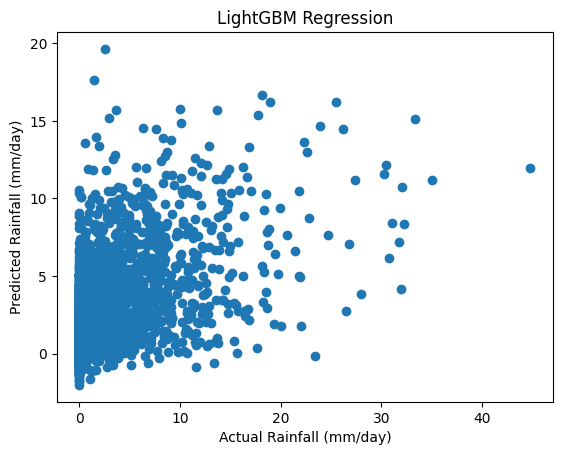

In [50]:
# prompt: rewrite the RF model with Lightgbmn and use optuna for hypertuning, Remember to add validation dataset


from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import optuna

from sklearn.model_selection import train_test_split
# Prepare features and target
X = data[['day', 'month', 'year', 'tmin', 'tmax', 'wdir', 'wspd', 'wpgt', 'pres','tsun']]
y = data['prcp']

# Train/Validation/Test Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=False) # 0.25 x 0.8 = 0.2


def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'n_estimators': trial.suggest_int('n_estimators', 100, 10000)
    }

    lgb_model = lgb.LGBMRegressor(**params, verbose=-1)
    lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[lgb.early_stopping(stopping_rounds=100)])
    y_pred_val = lgb_model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)  # Adjust the number of trials as needed

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

best_params = study.best_trial.params
best_lgb_model = lgb.LGBMRegressor(**best_params)
best_lgb_model.fit(X_train_val, y_train_val)

y_pred = best_lgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'LightGBM Regression Mean Squared Error: {mse}')

plt.scatter(y_test, y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('LightGBM Regression')
plt.show()

In [62]:
# prompt: use NSE instead of MSE for lightgbm optuna
# Prepare features and target
X = data[['day', 'month', 'year', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres','tsun']]
y = data['tavg']

# Train/Validation/Test Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=False) # 0.25 x 0.8 = 0.2

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()


def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'n_estimators': trial.suggest_int('n_estimators', 100, 10000)
    }

    lgb_model = lgb.LGBMRegressor(**params, verbose=-1)
    lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[lgb.early_stopping(stopping_rounds=100)])
    y_pred_val = lgb_model.predict(X_val)
    nse = 1 - (np.sum((y_val - y_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
    loss = 1 - nse # Optuna minimizes, so we return 1-nse
    #if np.min(y_pred_val)<0:
        #loss = np.inf
    return loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)  # Adjust the number of trials as needed

[I 2025-01-13 10:41:57,547] A new study created in memory with name: no-name-68fe11bb-e14b-42fa-9a03-36b0ada3700f


  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's rmse: 3.13793
[I 2025-01-13 10:41:58,051] Trial 0 finished with value: 0.19535829365534207 and parameters: {'num_leaves': 130, 'learning_rate': 0.2747506993855252, 'feature_fraction': 0.8303534089598833, 'bagging_fraction': 0.7256681100417597, 'bagging_freq': 1, 'min_child_samples': 52, 'n_estimators': 5677}. Best is trial 0 with value: 0.19535829365534207.
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[39]	valid_0's rmse: 3.07586
[I 2025-01-13 10:41:58,482] Trial 1 finished with value: 0.18770595881651664 and parameters: {'num_leaves': 158, 'learning_rate': 0.24205852748662138, 'feature_fraction': 0.6342748287809854, 'bagging_fraction': 0.6762567139051734, 'bagging_freq': 4, 'min_child_samples': 91, 'n_estimators': 4302}. Best is trial 1 with value: 0.18770595881651664.
Training until validation scores don't improve for 100 

Number of finished trials: 50
Best trial: {'num_leaves': 35, 'learning_rate': 0.00827358428300347, 'feature_fraction': 0.9659173885258329, 'bagging_fraction': 0.887211297049481, 'bagging_freq': 3, 'min_child_samples': 55, 'n_estimators': 6386}
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[6386]	valid_0's l2: 2.57444
LightGBM Regression Mean Squared Error: 11.316747755396104


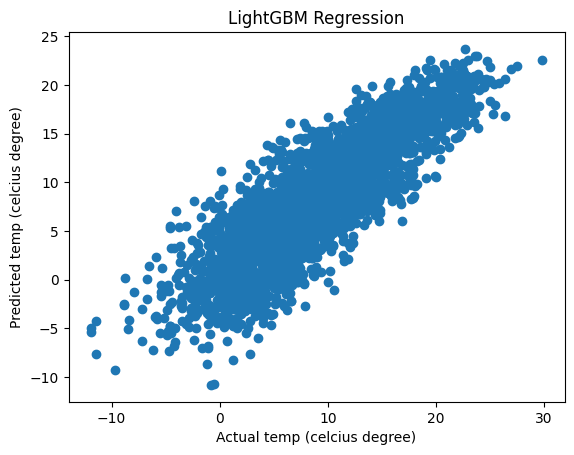

In [63]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

best_params = study.best_trial.params
best_lgb_model = lgb.LGBMRegressor(**best_params)
best_lgb_model.fit(X_train_val, y_train_val, eval_set=[(X_val, y_val)], callbacks=[lgb.early_stopping(stopping_rounds=100)])

y_pred = best_lgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'LightGBM Regression Mean Squared Error: {mse}')

plt.scatter(y_test, y_pred)
plt.ylabel('Predicted temp (celcius degree)')
plt.xlabel('Actual temp (celcius degree)')
plt.title('LightGBM Regression')
plt.show()

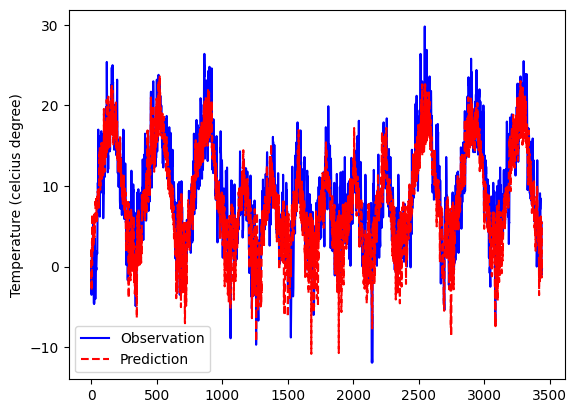

In [70]:
plt.plot(y_test.values,color='b',label='Observation')
plt.plot(y_pred,color='r',linestyle='--',label='Prediction')
plt.ylabel('Temperature (celcius degree)')
plt.legend()

In [72]:
# prompt: use NSE instead of MSE for lightgbm optuna
# Prepare features and target
X = data[['day', 'month', 'year', 'prcp', 'tavg', 'wpgt', 'pres','tsun']]
y = data['wspd']

# Train/Validation/Test Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=False) # 0.25 x 0.8 = 0.2

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()


def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'n_estimators': trial.suggest_int('n_estimators', 100, 10000)
    }

    lgb_model = lgb.LGBMRegressor(**params, verbose=-1)
    lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[lgb.early_stopping(stopping_rounds=100)])
    y_pred_val = lgb_model.predict(X_val)
    nse = 1 - (np.sum((y_val - y_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
    loss = 1 - nse # Optuna minimizes, so we return 1-nse
    #if np.min(y_pred_val)<0:
        #loss = np.inf
    return loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)  # Adjust the number of trials as needed

[I 2025-01-13 10:49:45,280] A new study created in memory with name: no-name-d298527f-11da-4c2c-9731-dad2c65b303e


  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	valid_0's rmse: 3.03901
[I 2025-01-13 10:49:46,138] Trial 0 finished with value: 0.3352968171270825 and parameters: {'num_leaves': 134, 'learning_rate': 0.27078873478013354, 'feature_fraction': 0.4190998038108258, 'bagging_fraction': 0.43538546977674175, 'bagging_freq': 4, 'min_child_samples': 15, 'n_estimators': 493}. Best is trial 0 with value: 0.3352968171270825.
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[81]	valid_0's rmse: 2.58551
[I 2025-01-13 10:49:46,859] Trial 1 finished with value: 0.24269327946985686 and parameters: {'num_leaves': 20, 'learning_rate': 0.053818782182779606, 'feature_fraction': 0.7629975919591481, 'bagging_fraction': 0.8684604094382771, 'bagging_freq': 2, 'min_child_samples': 23, 'n_estimators': 4707}. Best is trial 1 with value: 0.24269327946985686.
Training until validation scores don't improve for 100 r

In [ ]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

best_params = study.best_trial.params
best_lgb_model = lgb.LGBMRegressor(**best_params)
best_lgb_model.fit(X_train_val, y_train_val, eval_set=[(X_val, y_val)], callbacks=[lgb.early_stopping(stopping_rounds=100)])

y_pred = best_lgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'LightGBM Regression Mean Squared Error: {mse}')

plt.scatter(y_test, y_pred)
plt.ylabel('Predicted temp (celcius degree)')
plt.xlabel('Actual temp (celcius degree)')
plt.title('LightGBM Regression')
plt.show()

## 4. Neural Networks and Deep Learning
### Description
- Neural networks are a set of algorithms modeled loosely after the human brain, designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling, and clustering of raw input.




In [22]:
# Import libraries
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons

# Create Neural Network
model_nn = Sequential()
model_nn.add(Dense(200, activation='relu', input_shape=(X_train.shape[1],)))
model_nn.add(Dense(200, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
model_nn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train, y_train, epochs=50, batch_size=32)

# Predictions and Evaluation
y_pred = model_nn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'RF Regression Mean Squared Error: {mse}')

Epoch 1/50


323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2033 - loss: 410.9256
Epoch 2/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2022 - loss: 15.5151
Epoch 3/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2181 - loss: 21.0871
Epoch 4/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2129 - loss: 17.4350
Epoch 5/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2265 - loss: 19.9007
Epoch 6/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2138 - loss: 16.6253
Epoch 7/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2152 - loss: 18.7240
Epoch 8/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2147 - loss: 16.8661
Epoch 9/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2005 - loss: 15.5753
Epoch 10/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2034 - loss: 16.2028
Epoch 11/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2201 - loss: 17.0113
Epoch 12/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

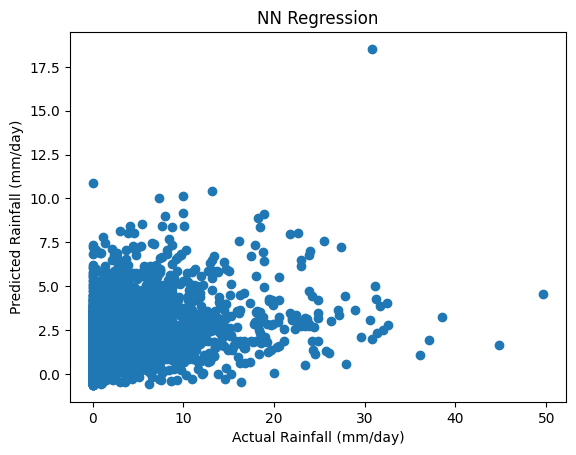

In [23]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('NN Regression')
plt.show()

In [24]:
# Import libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Feature engineering: create lagged features
def create_lagged_features(df, lag=1):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['prcp'].shift(i)
    return df.dropna()

# Assuming 'precipitation' is the target variable
df = create_lagged_features(data, lag=5)

# Split into features and target
X = df.drop(columns=['prcp']).values
y = df['prcp'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create Neural Network
model_nn = Sequential()
model_nn.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_nn.add(Dropout(0.2))
model_nn.add(BatchNormalization())
model_nn.add(LSTM(64, return_sequences=False))
model_nn.add(Dropout(0.2))
model_nn.add(BatchNormalization())
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the model with validation data
model_nn.fit(X_train, y_train, epochs=100, batch_size=32,
             validation_split=0.2,
             callbacks=[early_stopping])

# Predictions and Evaluation
y_pred = model_nn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Epoch 1/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2537 - loss: 13.1397 - mae: 1.9789 - val_accuracy: 0.3725 - val_loss: 14.5874 - val_mae: 1.7365
Epoch 2/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2769 - loss: 12.3379 - mae: 1.8999 - val_accuracy: 0.3061 - val_loss: 12.1179 - val_mae: 1.8454
Epoch 3/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2794 - loss: 13.1068 - mae: 1.8909 - val_accuracy: 0.3268 - val_loss: 11.9555 - val_mae: 1.8569
Epoch 4/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2903 - loss: 12.4319 - mae: 1.8138 - val_accuracy: 0.3395 - val_loss: 11.6257 - val_mae: 1.8010
Epoch 5/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3045 - loss: 12.4157 - mae: 1.8101 - val_accuracy: 0.3123 - val_loss: 11.6957 - val_mae: 1.8496
Epoch 6/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2878 - loss: 12.9417 - mae: 1.8551 - val_accuracy: 0.3257 - val_loss: 11.8383 - val_mae: 1.7487
Epoch 7/100
345/345 

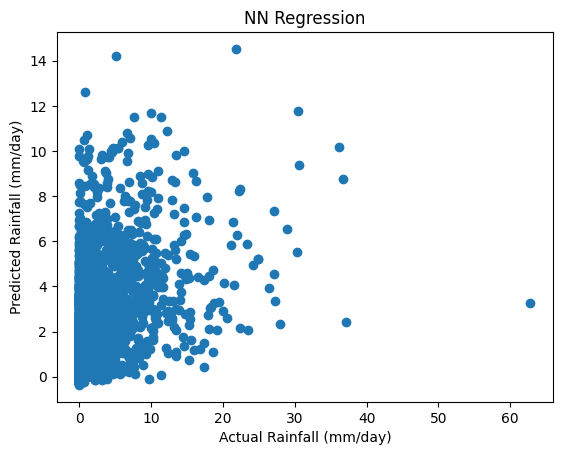

In [25]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('NN Regression')
plt.show()

In [28]:
# Import libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Feature engineering: create lagged features
def create_lagged_features(df, lag=1):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['prcp'].shift(i)
    return df.dropna()

# Assuming 'precipitation' is the target variable
df = create_lagged_features(data, lag=365)

# Split into features and target
X = df.drop(columns=['prcp']).values
y = df['prcp'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create Neural Network
model_nn = Sequential()
model_nn.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_nn.add(Dropout(0.2))
model_nn.add(BatchNormalization())
model_nn.add(LSTM(64, return_sequences=False))
model_nn.add(Dropout(0.2))
model_nn.add(BatchNormalization())
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the model with validation data
model_nn.fit(X_train, y_train, epochs=100, batch_size=32,
             validation_split=0.4,
             callbacks=[early_stopping])

# Predictions and Evaluation
y_pred = model_nn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.1843 - loss: 14.3588 - mae: 2.0927 - val_accuracy: 0.2545 - val_loss: 17.0770 - val_mae: 1.8651
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2050 - loss: 9.6732 - mae: 1.8426 - val_accuracy: 0.3034 - val_loss: 15.7379 - val_mae: 1.9467
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2727 - loss: 7.1285 - mae: 1.5679 - val_accuracy: 0.3487 - val_loss: 17.1319 - val_mae: 1.9624
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2940 - loss: 5.0604 - mae: 1.3301 - val_accuracy: 0.3694 - val_loss: 17.0450 - val_mae: 1.9704
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3144 - loss: 3.6194 - mae: 1.1711 - val_accuracy: 0.3550 - val_loss: 16.9180 - val_mae: 1.9577
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3182 - loss: 3.6919 - mae: 1.1616 - val_accuracy: 0.3628 - val_loss: 16.7868 - val_mae: 1.9679
Epoch 7/100
253/253 ━

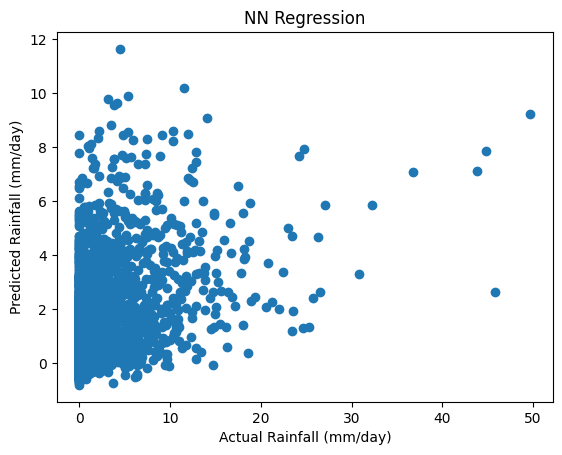

In [29]:
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('NN Regression')
plt.show()

In [31]:
# prompt: can you give a better configuration for deep learning model to predict time series of precipitation

# ... (Your existing code)

# Import libraries
from sklearn.preprocessing import MinMaxScaler

# Feature engineering: create lagged features and include other relevant features
def create_lagged_features(df, lag=1):
    for i in range(1, lag + 1):
        df[f'prcp_lag_{i}'] = df['prcp'].shift(i)
        df[f'tmin_lag_{i}'] = df['tmin'].shift(i)
        df[f'tmax_lag_{i}'] = df['tmax'].shift(i)
    return df.dropna()

# Create lagged features for a longer period (e.g., 365 days)
df = create_lagged_features(data, lag=365)

# Define features (X) and target (y)
features = [col for col in df.columns if 'lag' in col or col in ['wdir', 'wspd', 'pres', 'tsun']] #Include other relevant features
X = df[features].values
y = df['prcp'].values


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # Important: no shuffle for time series


# Scale data using MinMaxScaler
#scaler_x = MinMaxScaler(feature_range=(0, 1))
#scaler_y = MinMaxScaler(feature_range=(0, 1))

#X_train = scaler_x.fit_transform(X_train)
#X_test = scaler_x.transform(X_test)
#y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
#y_test = scaler_y.transform(y_test.reshape(-1, 1))


# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model with more layers, neurons, and dropout
model_nn = Sequential()
model_nn.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_nn.add(Dropout(0.3))  # Increased dropout
model_nn.add(LSTM(128, return_sequences=True))
model_nn.add(Dropout(0.3))
model_nn.add(LSTM(64, return_sequences=False))
model_nn.add(Dropout(0.3))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

# Compile the model with a different optimizer and learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate
model_nn.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
model_nn.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


# Predictions and evaluation
y_pred = model_nn.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)  # Inverse transform predictions
y_test = scaler_y.inverse_transform(y_test)  # Inverse transform true values

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.scatter(y_test, y_pred)
plt.ylabel('Predicted Rainfall (mm/day)')
plt.xlabel('Actual Rainfall (mm/day)')
plt.title('LSTM Regression')
plt.show()

Epoch 1/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.1341 - loss: 15.2263 - val_accuracy: 0.0108 - val_loss: 18.4281
Epoch 2/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.0598 - loss: 13.0970 - val_accuracy: 0.0108 - val_loss: 17.8498
Epoch 3/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.0705 - loss: 13.6354 - val_accuracy: 0.0108 - val_loss: 18.6514
Epoch 4/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.0393 - loss: 13.1866 - val_accuracy: 0.0108 - val_loss: 18.0733
Epoch 5/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.0605 - loss: 12.7589 - val_accuracy: 0.0289 - val_loss: 18.1733
Epoch 6/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.0309 - loss: 13.7053 - val_accuracy: 0.2025 - val_loss: 17.5611
Epoch 7/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.0981 - loss: 13.3141 - val_accuracy: 0.0108 - val_loss: 18.3996
Epoch 8/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.0675 

KeyboardInterrupt: 